<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Initialization with Same Weights </h1>


<h2>Table of Contents</h2>
<p>Aim: demonstrating the problem of initializing the weights w/ the same value. Even for a simple network, model will not be trained properly.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define the Neural Network with Same Weights Initialization define  Criterion Function, Optimizer, and Train the Model</a></li>
    <li><a href="#Train">Define the Neural Network with defult Weights Initialization define  Criterion Function, Optimizer, and Train the Model</a></li>
</ul>

<hr>

<h2>Preparation</h2>


In [1]:
import matplotlib.pylab as plt
import numpy as np

import torch
import torch.nn as nn
from torch import sigmoid

torch.manual_seed(0)

In [2]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg = True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(),
             label = ('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

<h2 id="Model">Neural Network Module and Training Function</h2> 


In [3]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define 1st linear layer as attribute, this is not good practice!
        self.a1 = None
        self.l1 = None
        self.l2 = None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2 = self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [4]:
# Define the training function

def train(Y, X, model, optimizer, criterion, epochs = 1000):
    cost = []
    total = 0
    for epoch in range(epochs):
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # cumulative loss
            total+=loss.item()
        cost.append(total)
        if epoch % 300 == 0:
            PlotStuff(X, Y, model, epoch, leg = True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0],
                        model.a1.detach().numpy()[:, 1], c = Y.numpy().reshape(-1))
            plt.title('Activations')
            plt.show()
    return cost

<h2 id="Makeup_Data">Make Some Data</h2>


In [5]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

<h2 id="Train">Define the Neural Network with Same Weights Initialization, Criterion Function, Optimizer and Train the Model</h2>

In [6]:
# The Cross-Entropy loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

In [7]:
D_in = 1 # size of input
H = 2 # size of hidden layer
D_out = 1 # number of outputs

learning_rate = 0.1

model = Net(D_in, H, D_out) # create the model 

In [8]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0075],
                      [ 0.5364]])),
             ('linear1.bias', tensor([-0.8230, -0.7359])),
             ('linear2.weight', tensor([[-0.2723,  0.1896]])),
             ('linear2.bias', tensor([-0.0140]))])

Same Weights Initialization with all ones for weights and zeros for the bias.


In [9]:
model.state_dict()['linear1.weight'][0] = 1.0
model.state_dict()['linear1.weight'][1] = 1.0
model.state_dict()['linear1.bias'][0] = 0.0
model.state_dict()['linear1.bias'][1] = 0.0
model.state_dict()['linear2.weight'][0] = 1.0
model.state_dict()['linear2.bias'][0] = 0.0
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.],
                      [1.]])),
             ('linear1.bias', tensor([0., 0.])),
             ('linear2.weight', tensor([[1., 1.]])),
             ('linear2.bias', tensor([0.]))])

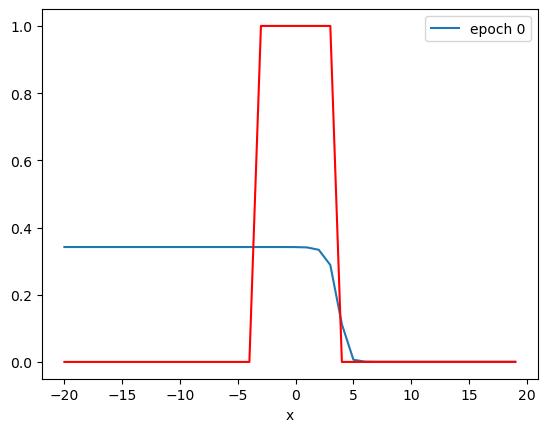

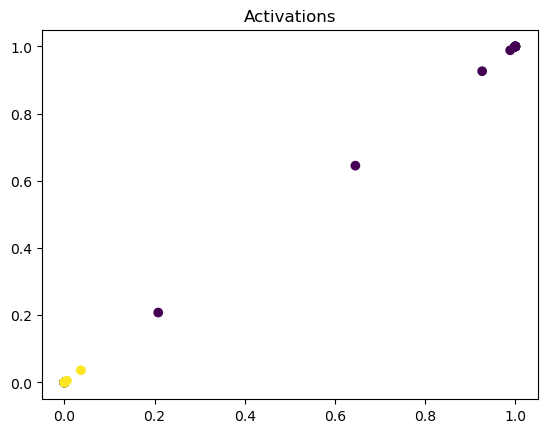

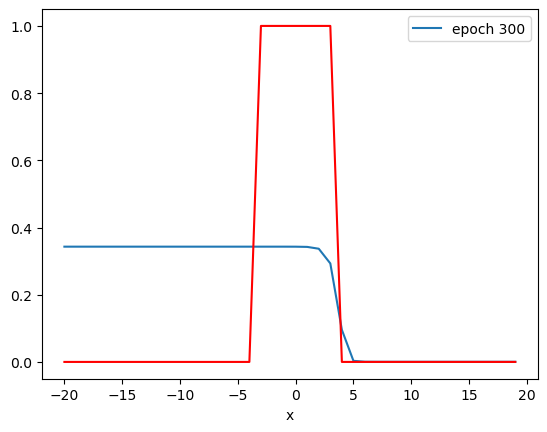

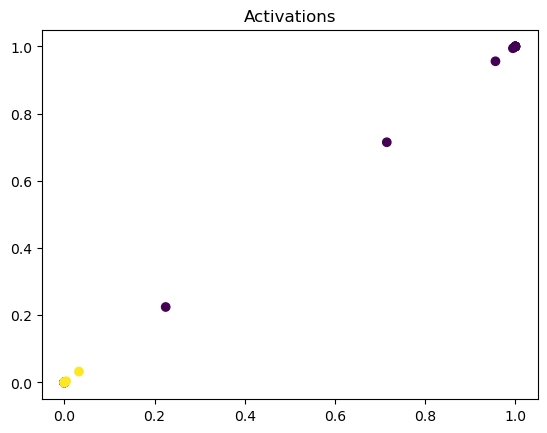

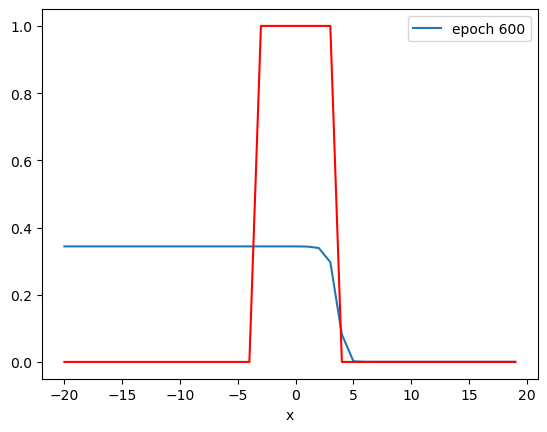

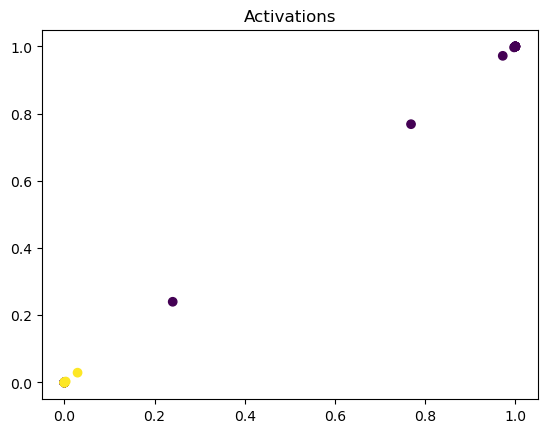

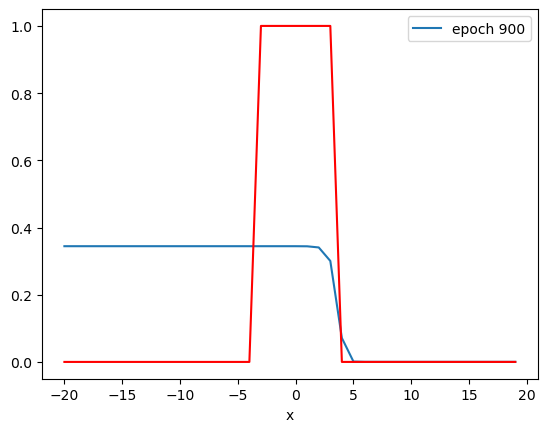

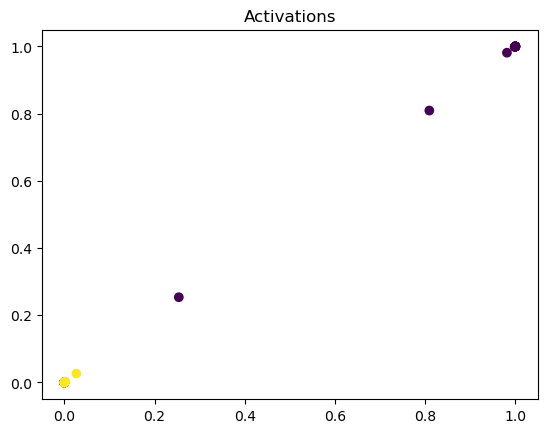

Text(0.5, 1.0, 'Cross Entropy Loss')

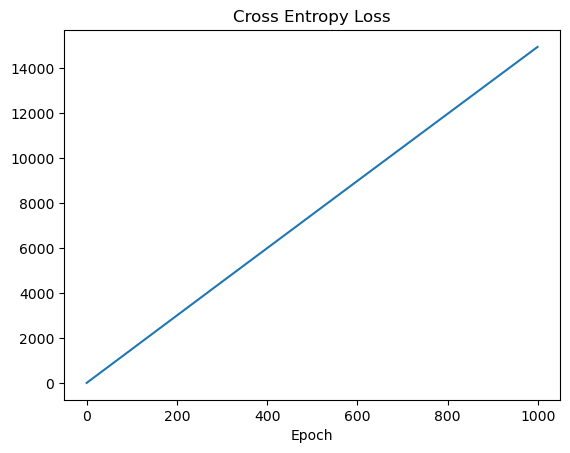

In [11]:
# Define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Train the model
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs = 1000)

# Plot the loss
plt.plot(cost_cross)
plt.xlabel('Epoch')
plt.title('Cross Entropy Loss')

In [12]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[2.5770],
                      [2.5770]])),
             ('linear1.bias', tensor([-11.3657, -11.3657])),
             ('linear2.weight', tensor([[-3.8278, -3.8278]])),
             ('linear2.bias', tensor([-0.6430]))])

In [13]:
yhat = model(torch.tensor([[-2.0],[0.0],[2.0]]))
yhat

tensor([[0.3446],
        [0.3446],
        [0.3411]], grad_fn=<SigmoidBackward0>)

<h2 id="Train2">Define the Neural Network, Criterion Function, Optimizer and Train the Model </h2>


Repeat the previous training steps by using the MSE cost or total loss: 

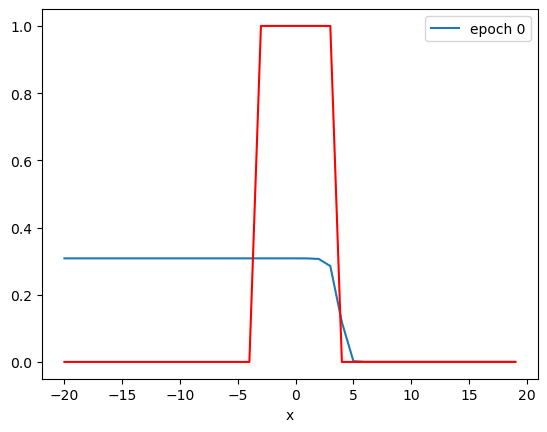

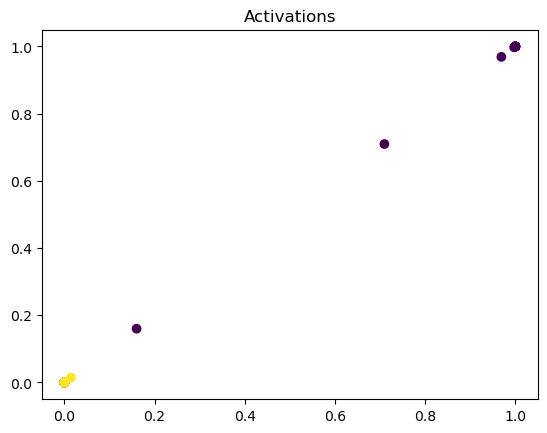

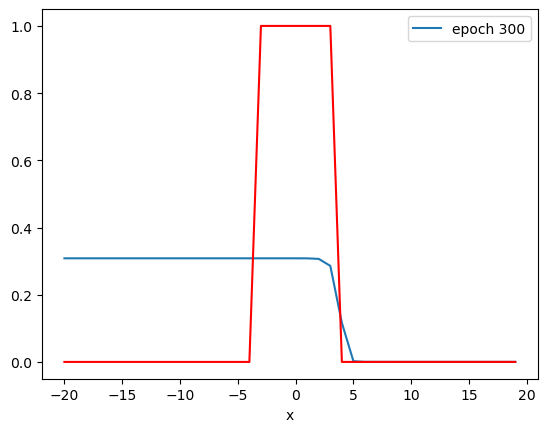

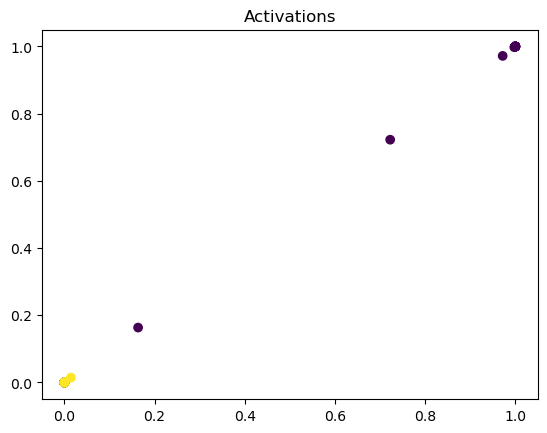

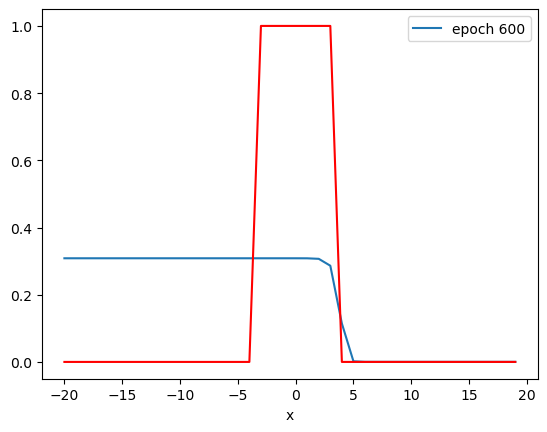

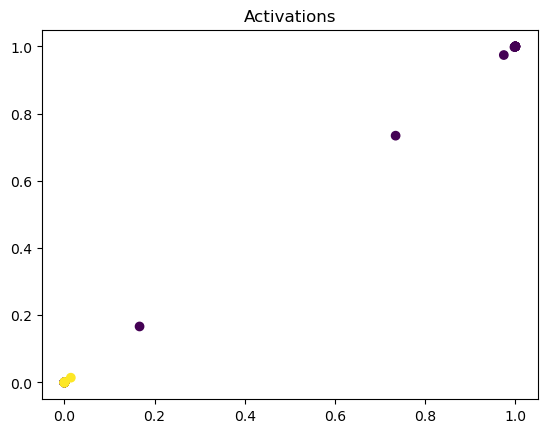

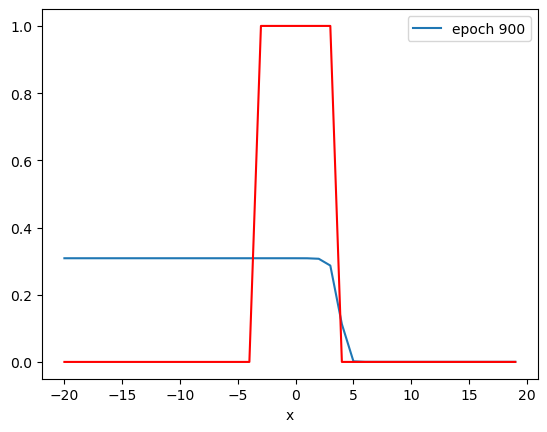

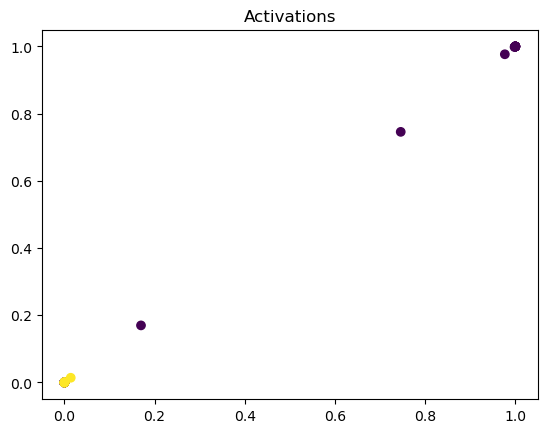

Text(0.5, 1.0, 'Mean Squared Loss')

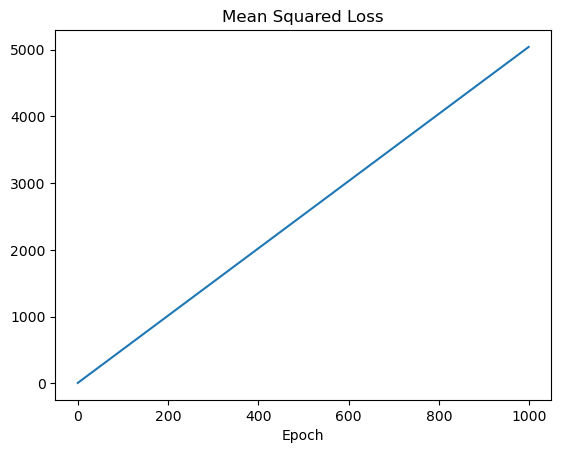

In [15]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion_mse = nn.MSELoss()

cost_cross_2 = train(Y, X, model, optimizer, criterion_mse, epochs=1000)

plt.plot(cost_cross_2)
plt.xlabel('Epoch')
plt.title('Mean Squared Loss')